# Applying Data Science in Supply Chain Management

Author: Rishabh (Rish) Kaushick <br>
GitHub : https://github.com/rkaushick-neu <br>
Dataset Link: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading the data
# structured data
scm_data_co_dataset_path = 'data/DataCoSupplyChainDataset.csv'
scm_df = pd.read_csv(scm_data_co_dataset_path, encoding='latin-1')

# unstructured data
scm_tokenized_access_logs_path = 'data/tokenized_access_logs.csv'
scm_tokenized_access_logs_df = pd.read_csv(scm_tokenized_access_logs_path)

In [3]:
# Let's see what the first five rows data looks like in the main structured dataset.
scm_df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [4]:
# total number of rows in the above csv:
scm_df.count()

Type                             180519
Days for shipping (real)         180519
Days for shipment (scheduled)    180519
Benefit per order                180519
Sales per customer               180519
Delivery Status                  180519
Late_delivery_risk               180519
Category Id                      180519
Category Name                    180519
Customer City                    180519
Customer Country                 180519
Customer Email                   180519
Customer Fname                   180519
Customer Id                      180519
Customer Lname                   180511
Customer Password                180519
Customer Segment                 180519
Customer State                   180519
Customer Street                  180519
Customer Zipcode                 180516
Department Id                    180519
Department Name                  180519
Latitude                         180519
Longitude                        180519
Market                           180519


From the above, we can see that most of the columns have 180,519 rows. <br>
Apart from these exceptions:
1. Customer Lname - 180,511 rows (8 null values)
2. Customer Zipcode - 180,516 rows (3 null values)
3. Order Zipcode - 24,840 rows (155,679 null values)
4. Product Description - 0 rows

Since the Product Description & the order zipcode columns have significantly less data compared to other columns, we can drop these columns entirely. <br>

We will handle the other columns later.

In [5]:
# Dropping the product description and the order zip-code columns
scm_df.drop(columns=['Product Description', 'Order Zipcode'], inplace=True)

In [6]:
# Looking into the unstructured dataset.
scm_tokenized_access_logs_df.head()

Product             Category  \
0     adidas Brazuca 2017 Official Match Ball  baseball & softball   
1       The North Face Women's Recon Backpack   hunting & shooting   
2      adidas Kids' RG III Mid Football Cleat       featured shops   
3  Under Armour Men's Compression EV SL Slide          electronics   
4                 Pelican Sunstream 100 Kayak         water sports   

            Date Month  Hour Department              ip  \
0  9/1/2017 6:00   Sep     6   fitness     37.97.182.65   
1  9/1/2017 6:00   Sep     6  fan shop     206.56.112.1   
2  9/1/2017 6:00   Sep     6   apparel    215.143.180.0   
3  9/1/2017 6:00   Sep     6  footwear     206.56.112.1   
4  9/1/2017 6:01   Sep     6  fan shop   136.108.56.242   

                                                 url  
0  /department/fitness/category/baseball%20&%20so...  
1  /department/fan%20shop/category/hunting%20&%20...  
2  /department/apparel/category/featured%20shops/...  
3  /department/footwear/category/electronics/prod...  
4  /department/fan%20shop/category/water%20sports...

In [7]:
scm_tokenized_access_logs_df.count()

Product       469977
Category      469977
Date          469977
Month         469977
Hour          469977
Department    469977
ip            469977
url           469977
dtype: int64

In the unstructured dataset, we can see that there are 8 columns and 469,977 rows each. Therefore there are 8 X 469,977 = 3,759,816 data points <br> <br>
In the main csv dataset, there are 53 columns and 180,519 rows. Therefore there are approximately 53 X 180,519 = 9,567,507 data points (without considering the null data).
<br><br>
For the scope of this project, we will use only the main csv dataset as it has more data points.

In [8]:
# understanding the number of distinct non null numbers are present in each column
scm_df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [9]:
scm_df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude  ...  Order Item Product Price  Order Item Profit Ratio  \
count  180519.000000  ...             180519.000000            180519.000000   
mean       29.719955  ...                141.232550                 0.120647   
std         9.813646  ...                139.732492                 0.466796   
min       -33.937553  ...                  9.990000                -2.750000   
25%        18.265432  ...                 50.000000                 0.080000   
50%        33.144863  ...                 59.990002                 0.270000   
75%        39.279617  ...                199.990005                 0.360000   
max        48.781933  ...               1999.989990                 0.500000   

       Order Item Quantity          Sales  Order Item Total  \
count        180519.000000  180519.000000     180519.000000   
mean              2.127638     203.772096        183.107609   
std               1.453451     132.273077        120.043670   
min               1.000000       9.990000          7.490000   
25%               1.000000     119.980003        104.379997   
50%               1.000000     199.919998        163.990005   
75%               3.000000     299.950012        247.399994   
max               5.000000    1999.989990       1939.989990   

       Order Profit Per Order  Product Card Id  Product Category Id  \
count           180519.000000    180519.000000        180519.000000   
mean                21.974989       692.509764            31.851451   
std                104.433526       336.446807            15.640064   
min              -4274.979980        19.000000             2.000000   
25%                  7.000000       403.000000            18.000000   
50%                 31.520000       627.000000            29.000000   
75%                 64.800003      1004.000000            45.000000   
max                911.799988      1363.000000            76.000000   

       Product Price  Product Status  
count  180519.000000        180519.0  
mean      141.232550             0.0  
std       139.732492             0.0  
min         9.990000             0.0  
25%        50.000000      

In [10]:
# Let's see what kind of data is present in the 'Type' Column
scm_df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1770aff70>,
 [Text(0.428168266257398, 1.1210137982068438, 'DEBIT'),
  Text(-1.1885215498911712, -0.16557936297826523, 'TRANSFER'),
  Text(0.19342361628901053, -1.1843087877161436, 'PAYMENT'),
  Text(1.130752535999951, -0.40174457349126647, 'CASH')])

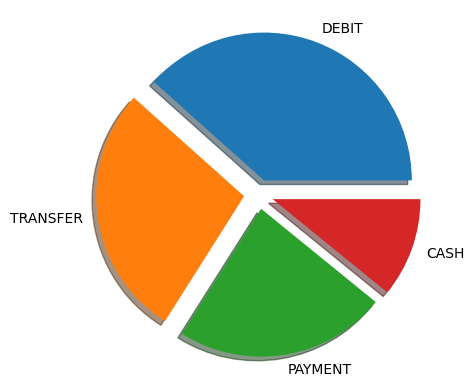

In [11]:
# visualizing the same thing in a pie chart

# Trying to create a plot with each section exploded from the pie.
my_explode = [0.1, 0.1, 0.1, 0.1]
my_labels = np.array(['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH'])
type_value_array = (scm_df['Type'].value_counts())
plt.pie(type_value_array, labels=my_labels, shadow=True, explode=my_explode)

In [12]:
# Delivery Status
scm_df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Delivery Status')

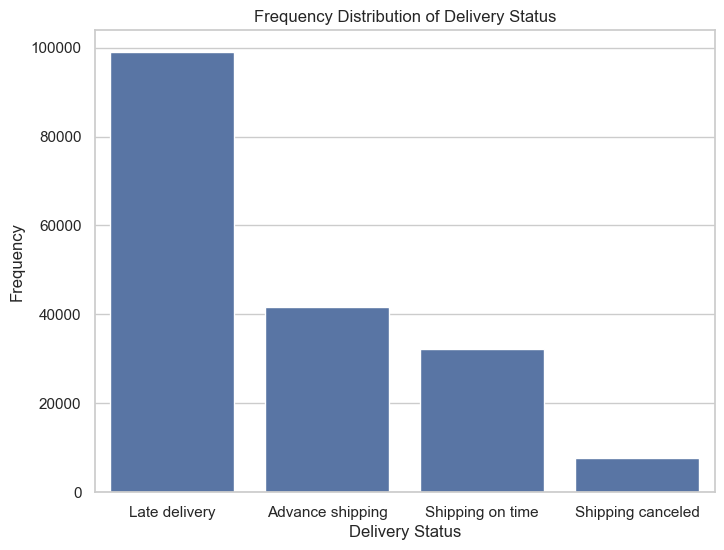

In [13]:
# plotting it in a graph to visualize it better
sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(scm_df['Delivery Status'].value_counts())
plt.xlabel("Delivery Status")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Delivery Status")

We can see that the Delivery Status for most of the deliveries in the dataset are 'Late delivery'

<Axes: xlabel='Late Delivery Risk', ylabel='Frequency'>

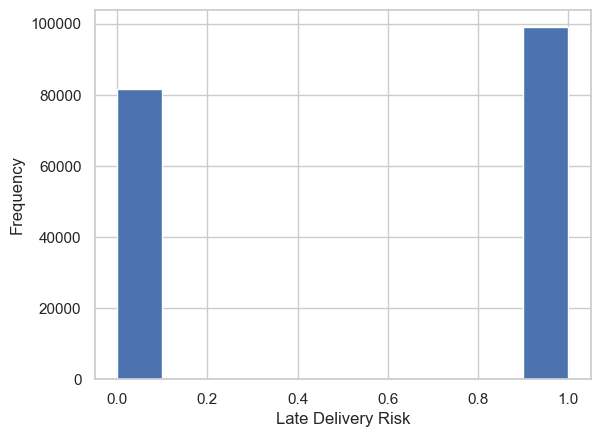

In [14]:
# late delivery risk column
# scm_df['Late_delivery_risk'].value_counts()
scm_df['Late_delivery_risk'].plot.hist(xlabel='Late Delivery Risk')

<Axes: xlabel='Delivery Status', ylabel='count'>

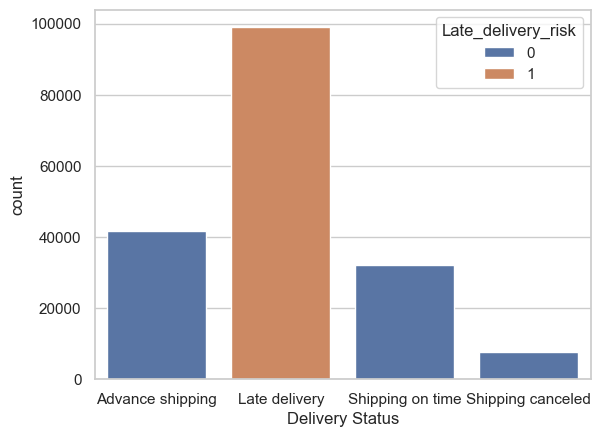

In [15]:
# late delivery risk and delivery status
sns.countplot(scm_df, x='Delivery Status', hue='Late_delivery_risk')

The above graph is counter-intuitive. Only on Late deliveries - we have 'Late delivery risk' as 1, and on all other Delivery statuses, the late delivery risk is 0.


Therefore, while training the model we can remove the Delivery Status column - since it is a redundant version of the 'Late delivery risk' column.

## Days for shipping (real) vs Days for shipment (scheduled)
Let us check whether these two are usually the same.

In [16]:
scm_df[['Days for shipping (real)', 'Days for shipment (scheduled)']].head()

Days for shipping (real)  Days for shipment (scheduled)
0                         3                              4
1                         5                              4
2                         4                              4
3                         3                              4
4                         2                              4

In [17]:
scm_df['Days for Shipment(scheduled-real)'] = scm_df['Days for shipment (scheduled)'] - scm_df['Days for shipping (real)']
scm_df['Days for Shipment(scheduled-real)']

0         1
1        -1
2         0
3         1
4         2
         ..
180514    0
180515   -1
180516   -1
180517    1
180518    0
Name: Days for Shipment(scheduled-real), Length: 180519, dtype: int64

In the above case since we subtracted the real days of shipping vs scheduled days of shipping:
- if value is 0: the scheduled scheduled was correct
- if value is negative: shipment arrived later than scheduled
- if value is positive: shipment arrived earlier than scheduled

In [18]:
# Analysing the real shipping time vs scheduled shipping time:
scm_df['Days for Shipment(scheduled-real)'].value_counts()

Days for Shipment(scheduled-real)
-1    60647
 0    33753
-2    28718
 1    21700
 2    21666
-3     7052
-4     6983
Name: count, dtype: int64

<Axes: xlabel='Days for Shipment(scheduled-real)', ylabel='count'>

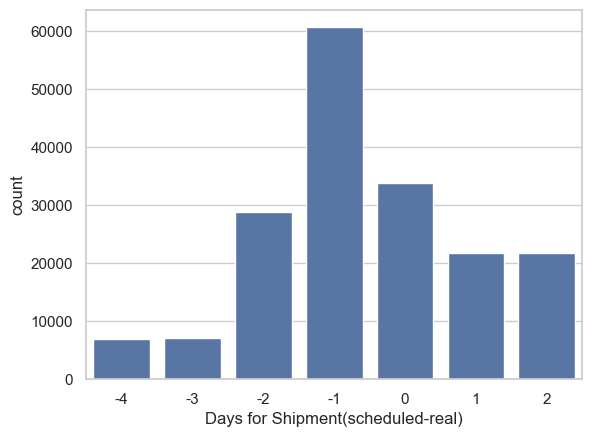

In [19]:
sns.countplot(x=scm_df['Days for Shipment(scheduled-real)'])

The graph and information above shows that:
1. Orders which were later than schedule = 103,400 (60647 + 28718 + 7052 + 6983)
2. Orders which were earlier than schedule = 43,366 (21700 + 21666)
3. Orders which arrived on scheduled date = 33,753

<Axes: xlabel='Days for Shipment(scheduled-real)', ylabel='count'>

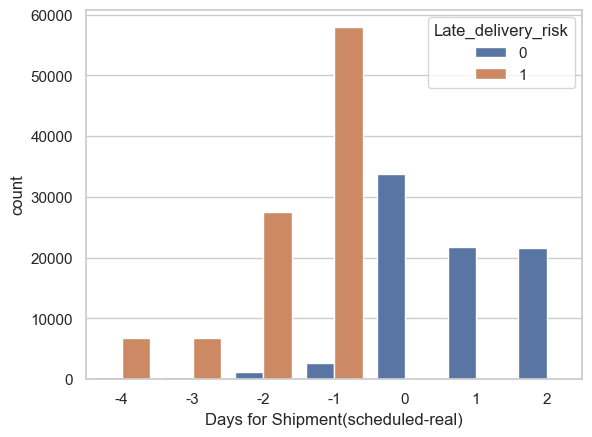

In [20]:
# late delivery risk and shipping scheduled minus real
sns.countplot(scm_df, x='Days for Shipment(scheduled-real)', hue='Late_delivery_risk')

This shows that most of the shipments which were late are classified as those with late delivery risk as 1. However, there are a few shipments which are 1 or 2 days late (-1 and -2) which have late delivery risk as 0.

In [21]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Type                               180519 non-null  object 
 1   Days for shipping (real)           180519 non-null  int64  
 2   Days for shipment (scheduled)      180519 non-null  int64  
 3   Benefit per order                  180519 non-null  float64
 4   Sales per customer                 180519 non-null  float64
 5   Delivery Status                    180519 non-null  object 
 6   Late_delivery_risk                 180519 non-null  int64  
 7   Category Id                        180519 non-null  int64  
 8   Category Name                      180519 non-null  object 
 9   Customer City                      180519 non-null  object 
 10  Customer Country                   180519 non-null  object 
 11  Customer Email                     1805

Let us try to find out more about location data of the customers which result in late delivery.

<Axes: xlabel='Order Region', ylabel='count'>

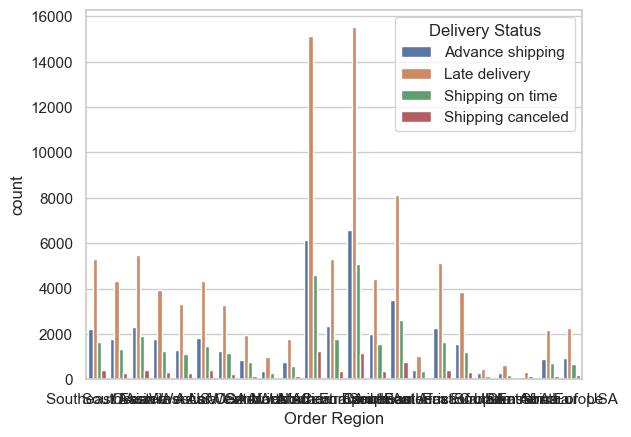

In [22]:
# Plotting geographic data of the customer locations which resulted in Late Delivery
sns.countplot(scm_df, x='Order Region', hue='Delivery Status')

The above plot is not useful since we are unable to see the regions on the x-axis

However, we can plot the same data but instead of order region in the x axis & different colors for delivery status, let us consider delivery status on the x-axis and regions with different colors

<Axes: xlabel='Delivery Status', ylabel='count'>

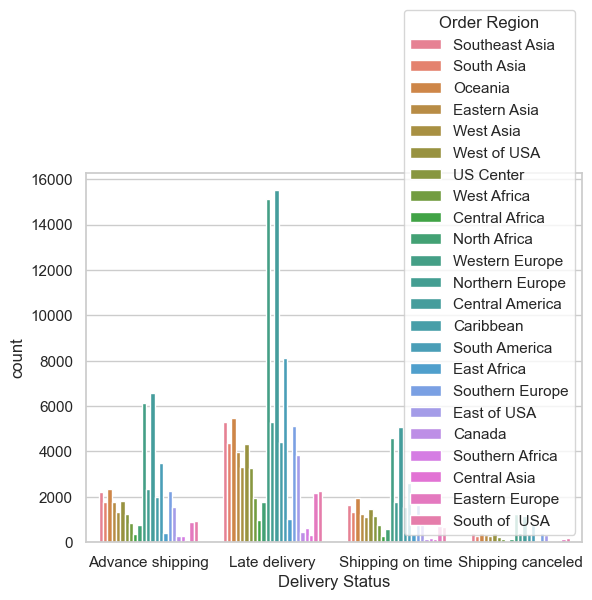

In [23]:
# trying to plot the same figure in a different way
sns.countplot(scm_df, x='Delivery Status', hue='Order Region')

This is better, but it is still hard to read the graph to understand exactly which region has most delivery statuses as 'Late delievry'

Therefore, using the plotly library as shown below in order to have an interactive graph to plot the same data.

In [24]:
# displaying the same data using plotly library
data_delivery_status_region=scm_df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
       )

In [25]:
# late delivery risk vs order region
data_delivery_status_region=scm_df.groupby(['Late_delivery_risk', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Late_delivery_risk', y='Number of Orders'  , color='Order Region',
       )

In [26]:
# Customer Segment
scm_df['Customer Segment'].value_counts()

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

In [27]:
# Market
scm_df['Market'].value_counts()

Market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

<Axes: xlabel='Market', ylabel='percent'>

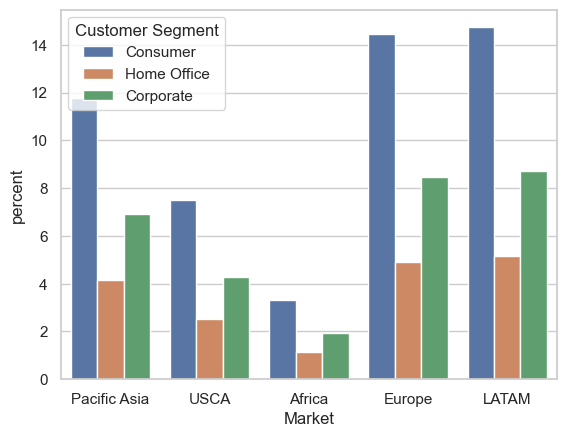

In [28]:
# In each market - finding the customer segment (Consumer, Home Office and Corporate frequencies)
sns.countplot(scm_df, x="Market", hue="Customer Segment", stat="percent", legend="auto")

In [29]:
# Order Status
scm_df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

<Axes: title={'center': 'ORDER STATUS'}>

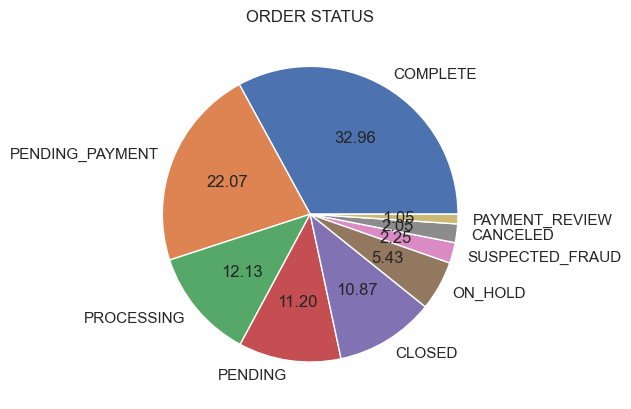

In [30]:
# again visualizing the order status with pie charts
scm_df['Order Status'].value_counts().plot.pie(title='ORDER STATUS',autopct="%.2f",ylabel="")

In [31]:
# Product Status
scm_df['Product Status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 180519 entries, 0 to 180518
Series name: Product Status
Non-Null Count   Dtype
--------------   -----
180519 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [32]:
scm_df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

Product Status can be 1 - not available and 0 available.
In this dataset, we can see that all the values are 0 (available).

Therefore this data is not useful to us, and we can drop this column.

In [33]:
scm_df.drop(columns=['Product Status'], inplace=True)

In [34]:
# Shipping Mode
scm_df['Shipping Mode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 180519 entries, 0 to 180518
Series name: Shipping Mode
Non-Null Count   Dtype 
--------------   ----- 
180519 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [35]:
scm_df['Shipping Mode'].describe()

count             180519
unique                 4
top       Standard Class
freq              107752
Name: Shipping Mode, dtype: object

In [36]:
scm_df['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

array([[<Axes: title={'center': 'Days for shipping (real)'}>,
        <Axes: title={'center': 'Days for shipment (scheduled)'}>,
        <Axes: title={'center': 'Benefit per order'}>,
        <Axes: title={'center': 'Sales per customer'}>,
        <Axes: title={'center': 'Late_delivery_risk'}>],
       [<Axes: title={'center': 'Category Id'}>,
        <Axes: title={'center': 'Customer Id'}>,
        <Axes: title={'center': 'Customer Zipcode'}>,
        <Axes: title={'center': 'Department Id'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Order Customer Id'}>,
        <Axes: title={'center': 'Order Id'}>,
        <Axes: title={'center': 'Order Item Cardprod Id'}>,
        <Axes: title={'center': 'Order Item Discount'}>],
       [<Axes: title={'center': 'Order Item Discount Rate'}>,
        <Axes: title={'center': 'Order Item Id'}>,
        <Axes: title={'center': 'Order Item Product Price'}>,
        <Axe

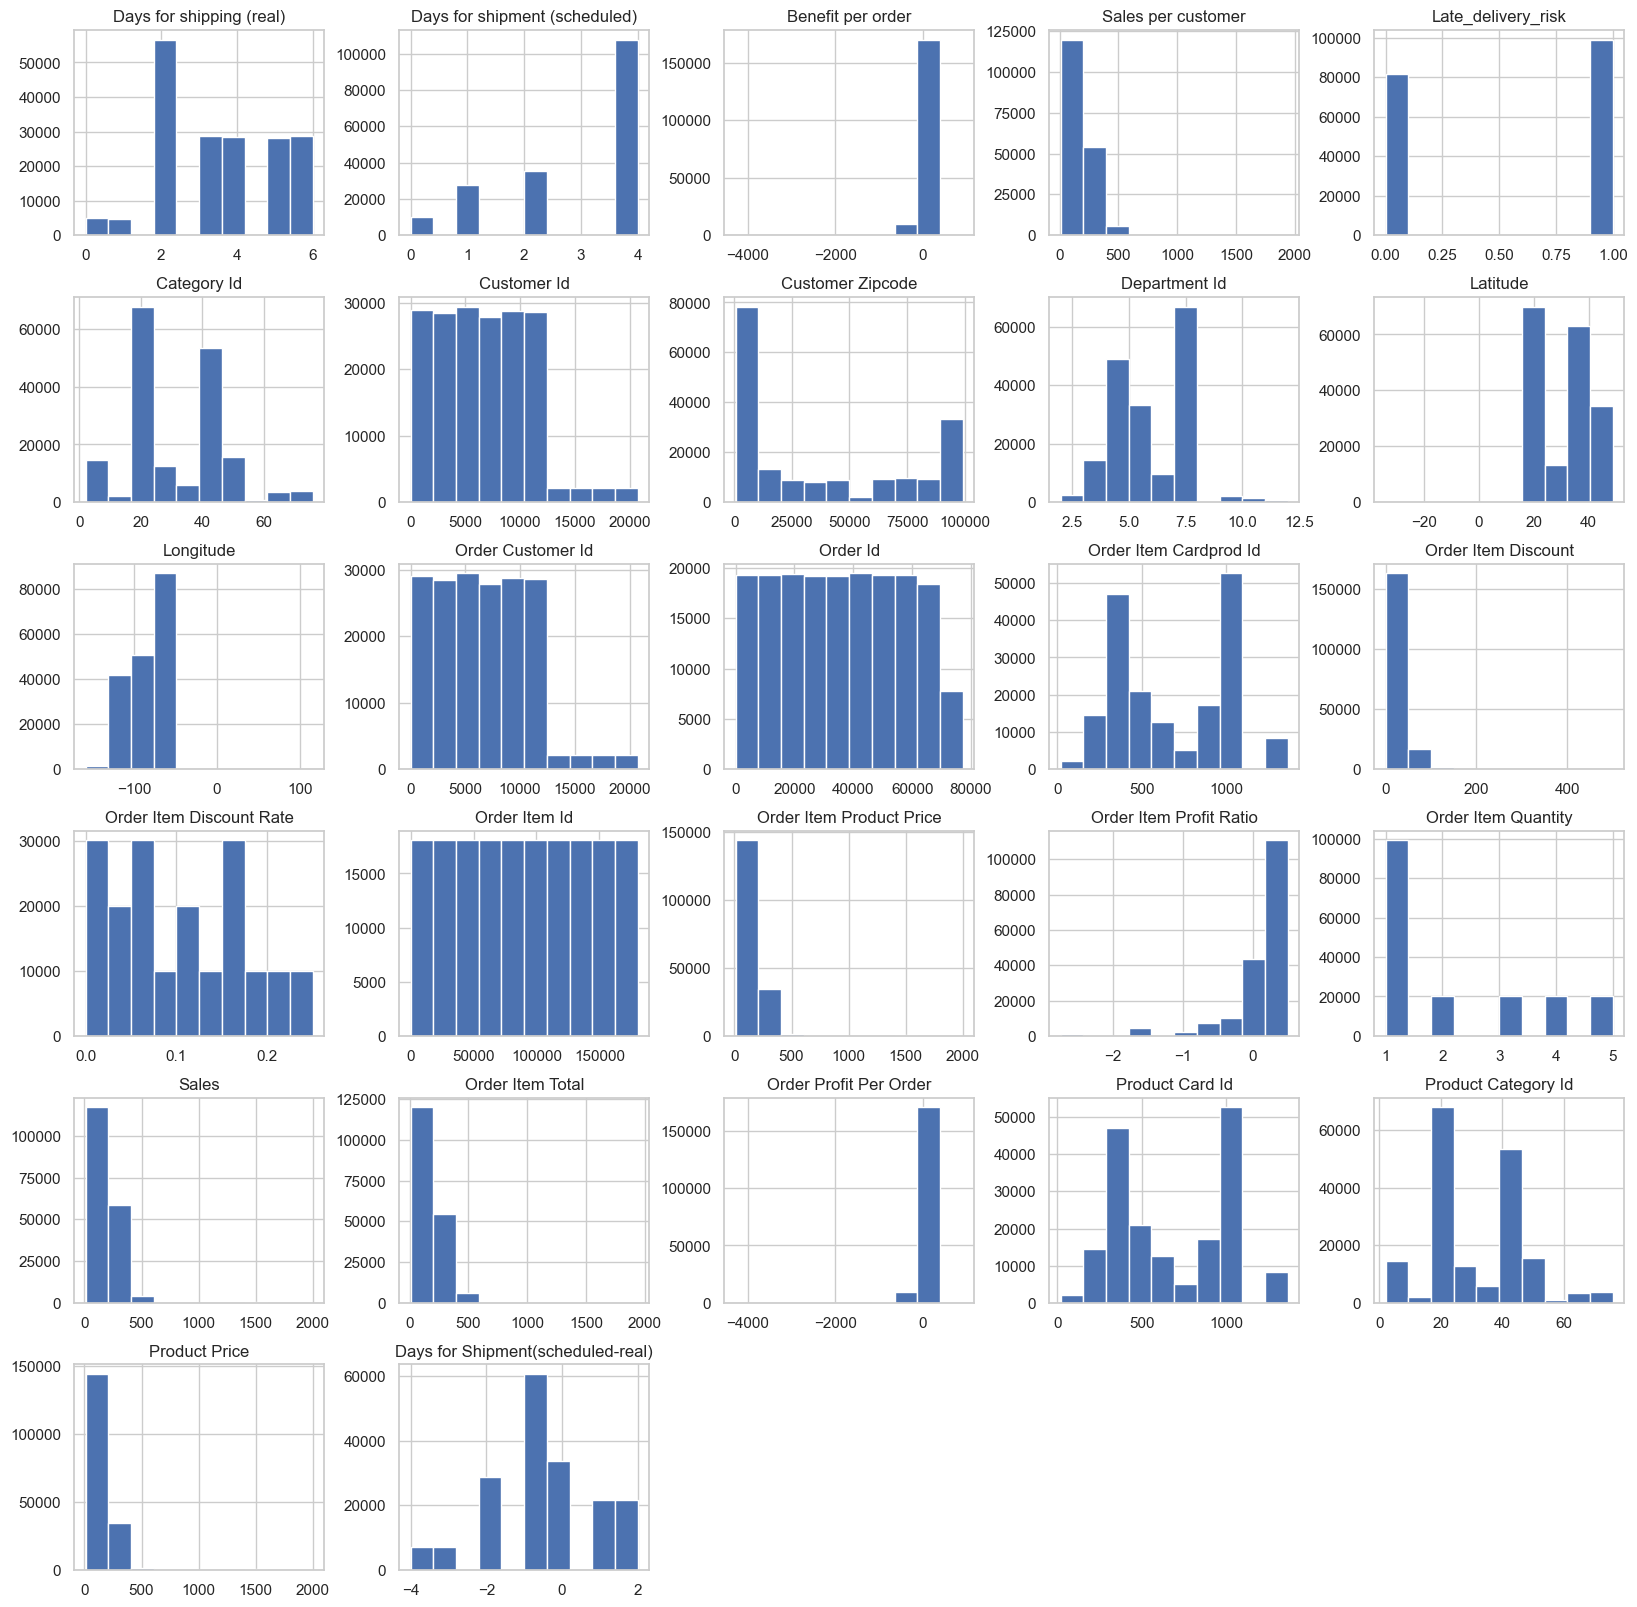

In [37]:
# plotting a histogram of all the columns
scm_df.hist(figsize=(20,20))

In [38]:
print(*scm_df['Category Name'].unique(), sep='\n')

Sporting Goods
Cleats
Shop By Sport
Women's Apparel
Electronics
Boxing & MMA
Cardio Equipment
Trade-In
Kids' Golf Clubs
Hunting & Shooting
Baseball & Softball
Men's Footwear
Camping & Hiking
Consumer Electronics
Cameras 
Computers
Basketball
Soccer
Girls' Apparel
Accessories
Women's Clothing
Crafts
Men's Clothing
Tennis & Racquet
Fitness Accessories
As Seen on  TV!
Golf Balls
Strength Training
Children's Clothing
Lacrosse
Baby 
Fishing
Books 
DVDs
CDs 
Garden
Hockey
Pet Supplies
Health and Beauty
Music
Video Games
Golf Gloves
Golf Bags & Carts
Golf Shoes
Golf Apparel
Women's Golf Clubs
Men's Golf Clubs
Toys
Water Sports
Indoor/Outdoor Games


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_54813/2825161110.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



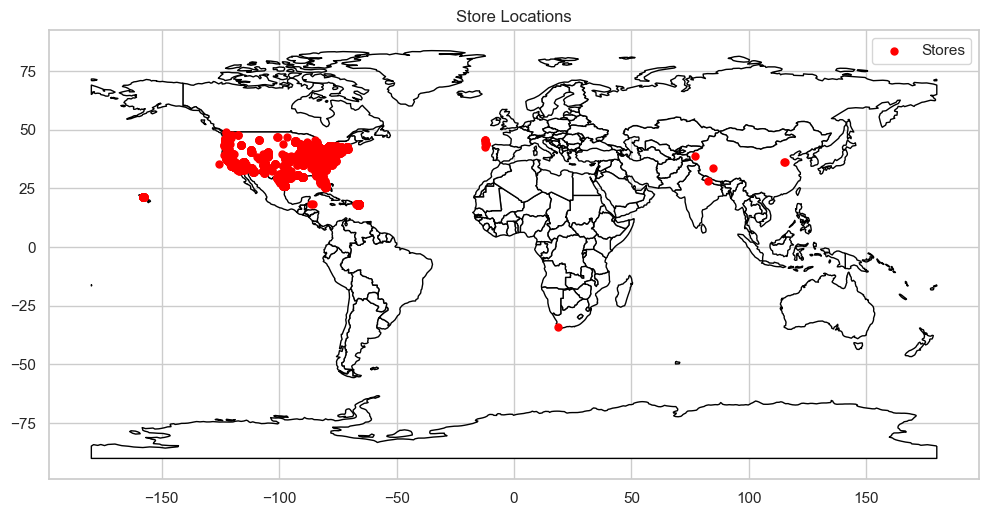

In [39]:
# using the latitude & longitude values from store to plot it on the world map
import geopandas as gpd

# dropping the duplicates and null rows
df_stores_location_lat_n_long = scm_df[['Latitude', 'Longitude']].drop_duplicates().dropna()

df_geo = gpd.GeoDataFrame(
    df_stores_location_lat_n_long,
    geometry=gpd.points_from_xy(df_stores_location_lat_n_long['Longitude'], df_stores_location_lat_n_long['Latitude'])
)

#get the map image
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plot the world map
ax = world.plot(figsize=(12, 8), color='white', edgecolor='black')

#plot the store locations as dots
df_geo.plot(ax=ax, marker='o', color='red', markersize=25, label='Stores')

plt.title('Store Locations')
plt.legend(loc='upper right')

In [40]:
scm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Type                               180519 non-null  object 
 1   Days for shipping (real)           180519 non-null  int64  
 2   Days for shipment (scheduled)      180519 non-null  int64  
 3   Benefit per order                  180519 non-null  float64
 4   Sales per customer                 180519 non-null  float64
 5   Delivery Status                    180519 non-null  object 
 6   Late_delivery_risk                 180519 non-null  int64  
 7   Category Id                        180519 non-null  int64  
 8   Category Name                      180519 non-null  object 
 9   Customer City                      180519 non-null  object 
 10  Customer Country                   180519 non-null  object 
 11  Customer Email                     1805

## Model Preparation
Let us start with removing the following columns
1. ID Columns:
    - 'Category Id', 
    - 'Customer Id', 
    - 'Department Id', 
    - 'Order Customer Id',
    - 'Order Id',
    - 'Order Item Cardprod Id',
    - 'Order Item Id',
    - 'Product Card Id',
    - 'Product Category Id',
2. Irrelevant Non-numeric Columns
    - 'Customer Email'
    - 'Customer Password'
    - 'Customer Fname'
    - 'Customer Lname'
    - 'Customer State'
    - 'Customer Street'
    - 'Customer Zipcode'
    - Order Region
    - Order State
    - Order Status
    - Product Image
3. Redundant Columns:
    - 'Delivery Status'
    - 'Customer City'
    - 'Customer Country' (since we already have Order City and Order Country)

We also will drop the column - 'Days for shipping (real)'. This is because we want to be able to predict whether the item might be delivered later than scheduled.

In [41]:
from sklearn import svm, metrics, tree, preprocessing, linear_model

In [43]:
scm_clean_df = scm_df.drop(columns=['Category Id', 
                                    'Customer Id', 
                                    'Department Id', 
                                    'Order Customer Id',
                                    'Order Id',
                                    'Order Item Cardprod Id',
                                    'Order Item Id',
                                    'Product Card Id',
                                    'Product Category Id',
                                    'Delivery Status',
                                    'Customer Email',
                                    'Customer Password',
                                    'Customer Fname',
                                    'Customer Lname',
                                    'Customer State',
                                    'Customer Street',
                                    'Customer Zipcode',
                                    'Customer City',
                                    'Customer Country',
                                    'Order Region',
                                    'Order State',
                                    'Order Status',
                                    'Product Image'])

In [51]:
scm_clean_df = scm_df.drop(columns=['Days for shipping (real)'])

### Text Columns with Categorical Data
    - Type
    - Category Name
    - Customer Segment
    - Department Name
    - Market
    - Order City
    - Order Country
    - order date (DateOrders)
    - Product Name
    - shipping date (DateOrders)
    - Shipping Mode

In [44]:
# need to use LabelEncoders to convert the categorical text values
label_encoder = preprocessing.LabelEncoder()

In [45]:
scm_clean_df['Type'] = label_encoder.fit_transform(scm_clean_df['Type'])
scm_clean_df['Category Name'] = label_encoder.fit_transform(scm_clean_df['Category Name'])
scm_clean_df['Customer Segment'] = label_encoder.fit_transform(scm_clean_df['Customer Segment'])
scm_clean_df['Department Name'] = label_encoder.fit_transform(scm_clean_df['Department Name'])
scm_clean_df['Market'] = label_encoder.fit_transform(scm_clean_df['Market'])
scm_clean_df['Order City'] = label_encoder.fit_transform(scm_clean_df['Order City'])
scm_clean_df['Order Country'] = label_encoder.fit_transform(scm_clean_df['Order Country'])
scm_clean_df['order date (DateOrders)'] = label_encoder.fit_transform(scm_clean_df['order date (DateOrders)'])
scm_clean_df['Product Name'] = label_encoder.fit_transform(scm_clean_df['Product Name'])
scm_clean_df['shipping date (DateOrders)'] = label_encoder.fit_transform(scm_clean_df['shipping date (DateOrders)'])
scm_clean_df['Shipping Mode'] = label_encoder.fit_transform(scm_clean_df['Shipping Mode'])

In [52]:
scm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Type                               180519 non-null  object 
 1   Days for shipment (scheduled)      180519 non-null  int64  
 2   Benefit per order                  180519 non-null  float64
 3   Sales per customer                 180519 non-null  float64
 4   Delivery Status                    180519 non-null  object 
 5   Late_delivery_risk                 180519 non-null  int64  
 6   Category Id                        180519 non-null  int64  
 7   Category Name                      180519 non-null  object 
 8   Customer City                      180519 non-null  object 
 9   Customer Country                   180519 non-null  object 
 10  Customer Email                     180519 non-null  object 
 11  Customer Fname                     1805

Now all the values are in either int or float.

## Splitting Train & Test Data

In [47]:
# Next creating the train and test set

# creating a function which splits the data randomly
def split_train_test(data, test_ratio):
    np.random.seed(23) # setting the random number generator's seed will make sure that each time the same test and train set will be considered.
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [48]:
# here we are splitting the data into 80% training and 20% testing sets.
scm_trainset, scm_testset = split_train_test(scm_clean_df, 0.2)

In [49]:
len(scm_trainset)

144416

In [50]:
len(scm_testset)

36103

# Decision Tree Model #1

In [53]:
from sklearn.tree import DecisionTreeClassifier
y = scm_trainset["Late_delivery_risk"]
X = scm_trainset.drop(columns="Late_delivery_risk")

tree_clf = DecisionTreeClassifier(max_depth=5, max_features="sqrt", random_state=23, splitter="random")
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=23,
                       splitter='random')

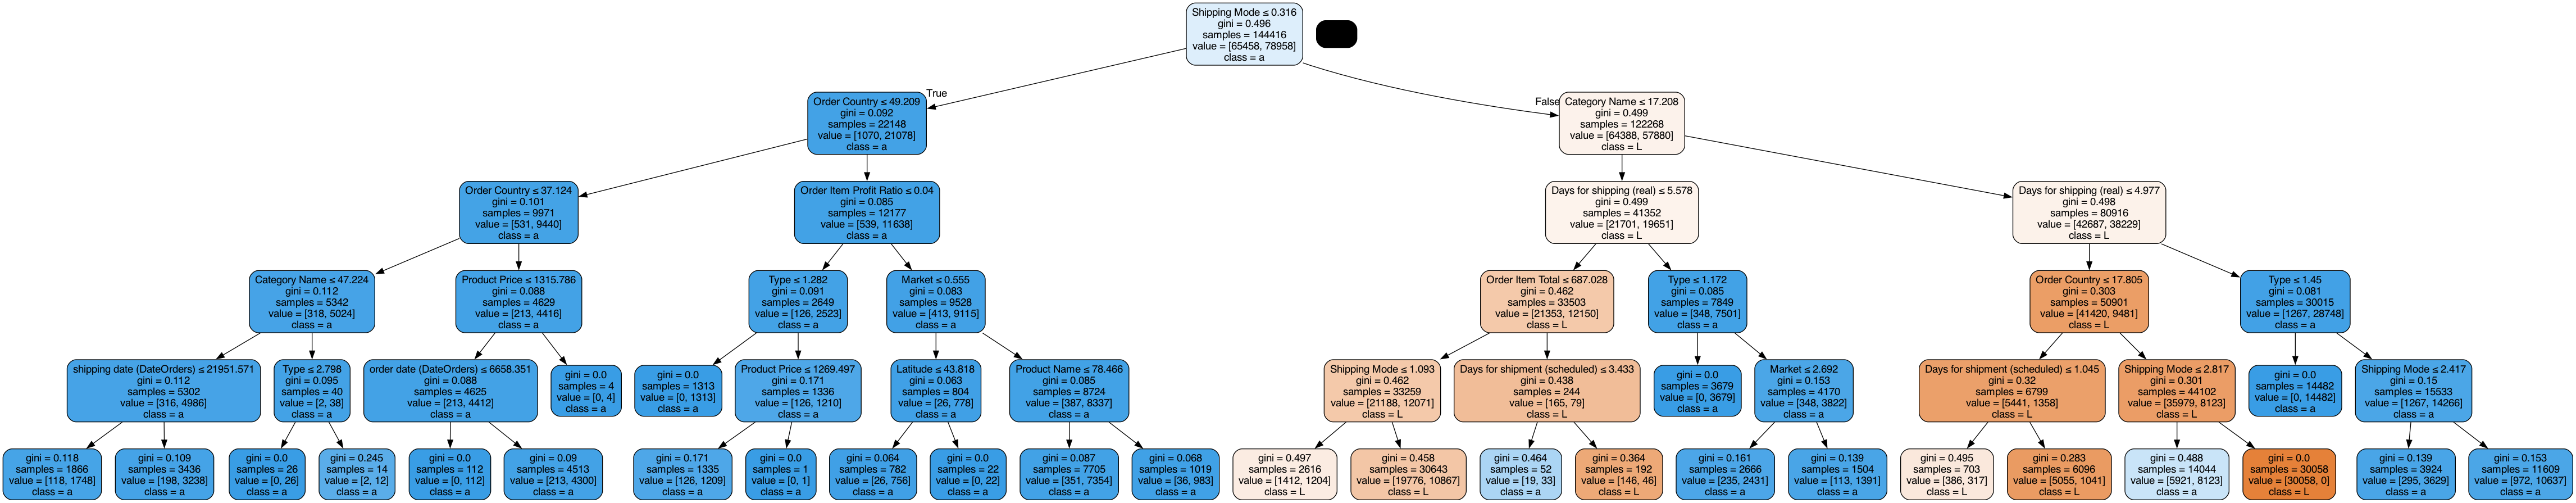

In [54]:
from sklearn.tree import export_graphviz
import pydotplus
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
        tree_clf,
        out_file=dot_data,
        feature_names= X.columns.values.tolist(),
        class_names= "Late_delivery_risk",
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_model_1.png')
Image(graph.create_png())



In [55]:
# The decision tree model has been trained. We can now test it using the same train-set data.

predictions = tree_clf.predict(X)
predictions

array([1, 0, 0, ..., 0, 1, 0])

In [56]:
# Using root mean sequared error to calculate the error percentage
from sklearn.metrics import mean_squared_error
tree_mean_sq_error = mean_squared_error(y, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.39119066344313314

The Root Mean Squared Error % as we can see is about 39.11%, which means the train accuracy is 60.89% for the Train Set.<br>
That is not bad. Let us see how it performs on the Test Set.

In [60]:
y_test = scm_testset["Late_delivery_risk"]
X_test = scm_testset.drop(columns="Late_delivery_risk")

test_predictions = tree_clf.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

0.38231549619540495

The Root Mean Squared Error % as we can see is about 38.23%, which means the test accuracy is 61.77% for the Train Set.

# Decision Tree Model #2

In [57]:
# Training the a second model on different parameters

tree_clf = DecisionTreeClassifier(max_depth=10, max_features="log2", random_state=5, splitter="random", criterion="gini")
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, max_features='log2', random_state=5,
                       splitter='random')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.859372 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.859372 to fit



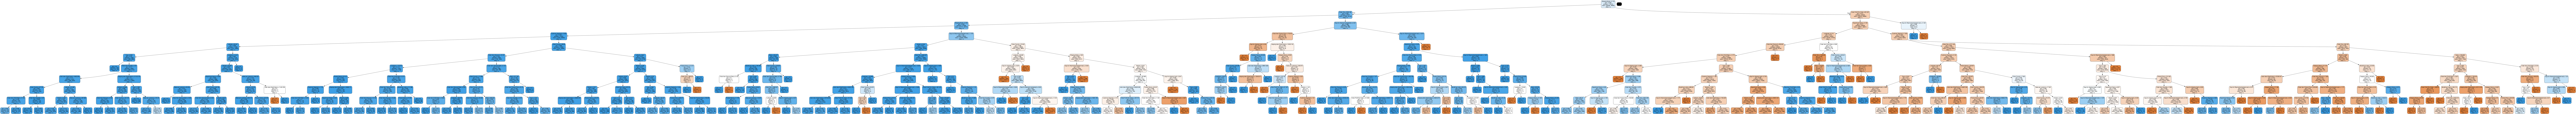

In [58]:
from sklearn.tree import export_graphviz
import pydotplus
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
        tree_clf,
        out_file=dot_data,
        feature_names= X.columns.values.tolist(),
        class_names= "Late_delivery_risk",
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_model_2.png')
Image(graph.create_png())



In [59]:
predictions = tree_clf.predict(X)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
tree_mean_sq_error = mean_squared_error(y, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

This has helped us improve the model from 46% to 52%.

In [ ]:
y_test = scm_testset['Late_delivery_risk']
X_test = scm_testset.drop(columns=['Late_delivery_risk'])
test_predictions = tree_clf.predict(X_test)
test_predictions

In [ ]:
tree_mean_sq_error = mean_squared_error(y_test, test_predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

We can see both train and test accuracy is around 52%.

------------------------------------------------------------------
<br>

## Mid Term Project finishes here.

## Final Project begins here.
<br> 

-----------------------------------------------------------------

## Revisiting The Data

There are some columns which can benefit from One Hot Encoding rather than Label Encoding: These columns are as follows:

In [ ]:
scm_updated = scm_df

In [ ]:
# just like above, let us remove the columns which are not needed
scm_updated.drop(columns=['Category Id', 
                                'Customer Id', 
                                'Department Id', 
                                'Order Customer Id',
                                'Order Id',
                                'Order Item Cardprod Id',
                                'Order Item Id',
                                'Product Card Id',
                                'Product Category Id',
                                'Product Description',
                                'Delivery Status',
                                'Customer Email',
                                'Customer Password',
                                'Product Status',
                                'Customer Fname',
                                'Customer Lname',
                                'Order Status',
                                'Product Image'],
                            inplace=True)

In [ ]:
scm_updated['Type'].value_counts()

In [ ]:
scm_updated['Customer Segment'].value_counts()

In [ ]:
scm_updated['Department Name'].value_counts()

In [ ]:
scm_updated['Market'].value_counts()

In [ ]:
scm_updated['Product Name'].value_counts()

In [ ]:
scm_updated['Shipping Mode'].value_counts()

## One Hot Encoding
We can use One Hot Encoding for the following columns:
1.	Type
2.	Delivery Status
3.	Customer Segment
4.	Market
5.	Shipping Mode

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder_type = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
# First performing encoding on 'Type' column
# before converting to One Hot Encoding, we are using Label Encoding
type_integer_encoded = label_encoder_type.fit_transform(scm_updated['Type'])
# initially the shape of type_integer_encoded is (180519,)
# therefore, we need to reshape it to (180519,1)
type_integer_encoded = type_integer_encoded.reshape(len(type_integer_encoded), 1)
type_integer_encoded

In [ ]:
# Let us see these categories of the Label Encoding
label_encoder_type.classes_

From the above we can see that the label encoding has converted the text to numbers in the following way: <br>
0: CASH <br>
1: DEBIT <br>
2: PAYMENT <br>
3: TRANSFER <br>

In [ ]:
# Now converting the Label Encoded values into One Hot Encoding
type_one_hot = one_hot_encoder.fit_transform(type_integer_encoded)
print(type_one_hot)
print() # printing new line char
print(type_one_hot.shape)

Each of the columns represent the respective Label Encoder. Therefore: 
- Column 0 represents CASH
- Column 1 represents DEBIT
- Column 2 represents PAYMENT
- Column 3 represents TRANSFER

## Issue with One Hot Encoding: Multi-Collinearity
Many times when doing One Hot Encoding, the issue of Dummy Variable trap comes to the picture - which further leads to the problem of multi-collinearity. <br><br>
For the 'Type' column above (and others), we will check for multi-collinearity using the Variance Inflation Factor (VIF) score.

In [ ]:
# importing a library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# defining a function which calculates VIF for all the columns
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
# first converting the one hot encoded value to pandas df object
calculate_vif(pd.DataFrame(type_one_hot))

We can see that all the four columns have VIF Value = 1. This means that all these columns can be added to the pandas data frame.

In [ ]:
scm_updated[['Cash Type', 'Debit Type', 'Payment Type', 'Transfer Type']] = type_one_hot

In [ ]:
# Verifying that the column names in the one hot encoding is correct
scm_updated.head(10)

In [ ]:
# And finally, we can now drop the Type column.
scm_updated = scm_updated.drop(columns=['Type'])

Similar to the above process, we will do the One Hot Encoding for the other columns as well.

In [ ]:
label_encoder_cust_seg = LabelEncoder()
label_encoder_market = LabelEncoder()
label_encoder_ship_mode = LabelEncoder()

In [ ]:
# label encoder & one hot encoder for - customer segment
cust_seg_integer_encoded = label_encoder_cust_seg.fit_transform(scm_updated['Customer Segment'])
cust_seg_integer_encoded = cust_seg_integer_encoded.reshape(len(cust_seg_integer_encoded), 1)
cust_seg_one_hot = one_hot_encoder.fit_transform(cust_seg_integer_encoded)

# label encoder & one hot encoder for - market
market_integer_encoded = label_encoder_market.fit_transform(scm_updated['Market'])
market_integer_encoded = market_integer_encoded.reshape(len(market_integer_encoded), 1)
market_one_hot = one_hot_encoder.fit_transform(market_integer_encoded)

# label encoder & one hot encoder for - shipping mode
ship_mode_integer_encoded = label_encoder_ship_mode.fit_transform(scm_updated['Shipping Mode'])
ship_mode_integer_encoded = ship_mode_integer_encoded.reshape(len(ship_mode_integer_encoded), 1)
ship_mode_one_hot = one_hot_encoder.fit_transform(ship_mode_integer_encoded)

In [ ]:
# now checking the vif for each of the above

print('VIF for Customer Segment')
print(calculate_vif(pd.DataFrame(cust_seg_one_hot)))

print('VIF for Market')
print(calculate_vif(pd.DataFrame(market_one_hot)))

print('VIF for Shipping Mode')
print(calculate_vif(pd.DataFrame(ship_mode_one_hot)))

Surprisingly the VIF values for all the other columns are also 1.0.
Therefore, we can add them all into the pandas data frame.

In [ ]:
# Customer Segment Encoding
print(label_encoder_cust_seg.classes_)

In [ ]:
scm_updated[['Consumer Customer Segment', 'Corporate Customer Segment', 'Home Office Customer Segment']] = cust_seg_one_hot

In [ ]:
scm_updated[['Customer Segment', 'Consumer Customer Segment', 'Corporate Customer Segment', 'Home Office Customer Segment']].head(10)

In [ ]:
scm_updated = scm_updated.drop(columns=['Customer Segment'])

In [ ]:
# Market Encoding
print(label_encoder_market.classes_)

In [ ]:
scm_updated[['Africa Market', 'Europe Market', 'LATAM Market', 'Pacific Asia Market', 'USCA Market']] = market_one_hot

In [ ]:
scm_updated = scm_updated.drop(columns=['Market'])

In [ ]:
# Shipping Mode Encoding
print(label_encoder_ship_mode.classes_)

In [ ]:
scm_updated[['First Class Shipping Mode','Same Day Shipping Mode','Second Class Shipping Mode','Standard Class Shipping Mode']] = ship_mode_one_hot

In [ ]:
scm_updated = scm_updated.drop(columns=['Shipping Mode'])

In [ ]:
# Let's see how the data frame looks like now
scm_updated.info()

## Binary Encoding
Let us consider the other columns:
- Category Name
- Department Name
- Product Name

For the columns listed above, there are too many categories of data. This makes it unreasonable to use One Hot Encoding as the model will become highly complex. Furthermore, the values in this column do not have any inherent order. This means that Label Encoders will also not be a good idea. For this project I have decided to explore the use of Binary Encoders as a solution to encode the above columns.

In [ ]:
# Let us explore the other columns
print(scm_updated[['Category Name']].nunique())
print()
print(scm_updated[['Department Name']].nunique())
print()
print(scm_updated[['Product Name']].nunique())

We can see that there are a total of 50 unique category names, 11 unique department names, and 118 unique product names in this dataset.

In [ ]:
# importing category_encoders
import category_encoders as ce

In [ ]:
binary_encoder_cat_name = ce.BinaryEncoder(cols=['Category Name'], return_df=True)
cat_name_binary_encoded_data = binary_encoder_cat_name.fit_transform(scm_updated['Category Name'])
cat_name_binary_encoded_data

Converting 50 (decimal) to binary will result in 110010. This requires 6 columns (since there are 6 bits) to represnt all the data. <br>
Practically, from the above we can see that the binary encoding has created 6 columns - column 0 to column 5.

In [ ]:
scm_updated[['Category Name 0', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'Category Name 5']] = cat_name_binary_encoded_data
scm_updated[['Category Name','Category Name 0', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'Category Name 5']].head(-10)

We can see that 'Sporting Goods' category is encoded as '000001' and 'Fishing' is encoded as '100000'.

In [ ]:
scm_updated.drop(columns=['Category Name'], inplace=True)
scm_updated.info()

In [ ]:
# similarly, let us use binary encoding for the other two columns as well

binary_encoder_dept_name = ce.BinaryEncoder(cols=['Department Name'], return_df=True)
dept_name_binary_encoded_data = binary_encoder_dept_name.fit_transform(scm_updated['Department Name'])
# Department has 10 categories = 1010 in binary. Therefore we need 4 columns:
scm_updated[['Department Name 0', 'Department Name 1', 'Department Name 2', 'Department Name 3']] = dept_name_binary_encoded_data

binary_encoder_prod_name = ce.BinaryEncoder(cols=['Product Name'], return_df=True)
prod_name_binary_encoded_data = binary_encoder_prod_name.fit_transform(scm_updated['Product Name'])
# Product Name has 118 categories = 1110110 in binary. Therefore we need 7 columns:
scm_updated[['Product Name 0', 'Product Name 1', 'Product Name 2', 'Product Name 3', 'Product Name 4', 'Product Name 5', 'Product Name 6']] = prod_name_binary_encoded_data


In [ ]:
scm_updated.drop(columns=['Department Name', 'Product Name'], inplace=True)

In [ ]:
scm_updated.info()

## Handling Date Columns
We can see that there are some date/ time columns which pandas is currently reading as 'object' or string. They are:
- order date (DateOrders)
- shipping date (DateOrders)

Let us convert these strings to Date datatype, so that we can split each value into different columns. <br>
For example, order date can be stored in the following way:
- Order Date Month
- Order Date Day
- Order Date Year 
- Order Date Hour
- Order Date Min

In [ ]:
scm_updated['order date (DateOrders)'].head()

In [ ]:
scm_updated['shipping date (DateOrders)'].head()

From the data, we can see that order date and shipping date are both in the Month/Day/Year HH:MM format.

In [ ]:
# first let us convert this into a date datatype.
scm_updated['order date (DateOrders)'] = pd.to_datetime(scm_updated['order date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')
scm_updated['order date (DateOrders)'].info()

In [ ]:
# similarly for shipping date
scm_updated['shipping date (DateOrders)'] = pd.to_datetime(scm_updated['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')

In [ ]:
# now splitting the values into multiple columns:

scm_updated['Order Date Year'] = scm_updated['order date (DateOrders)'].dt.year
scm_updated['Order Date Month'] = scm_updated['order date (DateOrders)'].dt.month
scm_updated['Order Date Day'] = scm_updated['order date (DateOrders)'].dt.day
scm_updated['Order Date Hour'] = scm_updated['order date (DateOrders)'].dt.hour
scm_updated['Order Date Min'] = scm_updated['order date (DateOrders)'].dt.minute

scm_updated['Shipping Date Year'] = scm_updated['shipping date (DateOrders)'].dt.year
scm_updated['Shipping Date Month'] = scm_updated['shipping date (DateOrders)'].dt.month
scm_updated['Shipping Date Day'] = scm_updated['shipping date (DateOrders)'].dt.day
scm_updated['Shipping Date Hour'] = scm_updated['shipping date (DateOrders)'].dt.hour
scm_updated['Shipping Date Min'] = scm_updated['shipping date (DateOrders)'].dt.minute

In [ ]:
# Let us look at the new columns now:
scm_updated[['order date (DateOrders)', 'Order Date Year', 'Order Date Month', 'Order Date Day', 'Order Date Hour', 'Order Date Min']].head()

In [ ]:
# Let us look at the new columns now:
scm_updated[['shipping date (DateOrders)', 'Shipping Date Year', 'Shipping Date Month', 'Shipping Date Day', 'Shipping Date Hour', 'Shipping Date Min']].head()

In [ ]:
# now we can drop order date (DateOrders) & shipping date (DateOrders)
scm_updated.drop(columns=['order date (DateOrders)', 'shipping date (DateOrders)'], inplace=True)

In [ ]:
# Analysing the date columns
scm_updated['Order Date Year'].describe()

In [ ]:
scm_updated.groupby('Order Date Year').size()

From the above we can see that the orders were mainly between 2015 - 2017, and there are only a few year values in 2018.

In [ ]:
scm_updated.groupby('Order Date Month').size()

In [ ]:
scm_updated.groupby('Order Date Day').size()

In [ ]:
scm_updated.groupby(['Order Date Year', 'Order Date Month']).size()

## Handling Null Values

In [ ]:
# setting pandas to display all rows
pd.set_option('display.max_rows', None)

scm_updated.isna().sum()

We can see that the Order Zip Code has 155,679 null rows. Considering that our dataset has a total of 180,519 rows, it would be better to drop the order zip code column altogether. <br><br>
Also the Customer Zip Code has 3 null values. Since 3 is extremely small compared to the number of rows in our dataset, we can remove those rows containing null rows for the customer zip-code.

In [ ]:
# dropping entire column for the order zipcode
scm_updated.drop(columns=['Order Zipcode'], inplace=True)

In [ ]:
# dropping the 3 null rows
scm_updated.dropna(inplace=True)

In [ ]:
# setting pandas to display 50 rows
pd.set_option('display.max_rows', 100)
scm_updated.isna().sum()

In [ ]:
len(scm_updated)

## Feature Engineering
### Latitude & Longitude for Customer Locations
In the mid-term project, I visualized the stores on the world map. This was possible becaues the stores data had numerical values for the latitude and the longitude. <br><br>
However, there are no latitude and longitude values for the customer locations. Therefore in this section I will try to convert the values from text to latitude & longitude.

In [ ]:
# setting pandas to display 10 rows
pd.set_option('display.max_rows', 10)

scm_updated[['Customer Street', 'Customer City', 'Customer State', 'Customer Country', 'Customer Zipcode', 'Order City', 'Order State', 'Order Country', 'Latitude', 'Longitude']].head(-10)

In the data definition csv file, it is mentioned that the latitude & longitude belong to the store, however I did some analysis and realized that the latitude & longitude data is of the customer location. For example on row 3, we can see that customer city is Los Angeles and order city is Townsville. I used an online Latitude & Longitude Finder and noticed that the latitude & longitude value as mentioned in the data frame correspond to the customer city.

Therefore, when we mapped the latitude & longitude on the map of the world initially, we were mapping the customer location, and not the store location.

In [ ]:
# using the latitude & longitude values to plot the customer location on the world map

# dropping the duplicates rows
df_stores_location_lat_n_long = scm_df[['Latitude', 'Longitude']].drop_duplicates()

df_geo = gpd.GeoDataFrame(
    df_stores_location_lat_n_long,
    geometry=gpd.points_from_xy(df_stores_location_lat_n_long['Longitude'], df_stores_location_lat_n_long['Latitude'])
)

#get the map image
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plot the world map
ax = world.plot(figsize=(12, 8), color='white', edgecolor='black')

#plot the store locations as dots
df_geo.plot(ax=ax, marker='o', color='red', markersize=25, label='Customer Location')

plt.title('Map of Customer Locations')
plt.legend(loc='upper right')

Similar to the above figure, it is important for us to understand the order store locations. One major issue for the late deliveries could be because the customer locations are far away from the stores. <br><br>
Therefore, let us try to generate the latitude and longitude values of the Order Location.

In [ ]:
# in order to use geopy library, I had to create an account in geonames.org/login and enable free web services.

from geopy import geocoders
geonames = geocoders.GeoNames(username='<<enter username here>>')
geonames.geocode("Bikaner, Rajastán")

In [ ]:
geonames.geocode("Bikaner, Rajastán")[1]

In [ ]:
print("Latitude: "),
print(geonames.geocode("Bikaner, Rajastán")[1][0])
print("Longitude: "),
print(geonames.geocode("Bikaner, Rajastán")[1][1])

From the above we can see that we are able to get the correct latitude and longitude values for the city and state input.

In [ ]:
# crearted this function to iterate through the data frame, and return a new dataframe contianing the latitude and longitude
from geopy import geocoders
import pandas as pd

def get_latitude_longitude_values(df):
    geoname = geocoders.GeoNames(username='<<enter username here>>')
    new_df = pd.DataFrame(columns=['Order Latitude', 'Order Longitude'])
    for ind, row in df.iterrows():
        new_row = pd.DataFrame({'Order Latitude': geoname.geocode(str(row['Order City'])+", "+str(row['Order State']))[1][0],
                                    'Order Longitude': geoname.geocode(str(row['Order City'])+", "+str(row['Order State']))[1][1]
                                }, 
                                index=[ind]
                               )
        new_df = pd.concat([new_df, new_row], ignore_index=True)
        print("Done with "+str(ind))
        # if(ind == 9):
            #safety break 
            # break
    return new_df

In [ ]:
new_df = get_latitude_longitude_values(scm_updated)
new_df.head()

We received an error saying None Type object is not subscriptable. Therefore, in the function we added a print to debug while line in the data frame we are receiving this error. It has come from pandas line 25. Let's see the data in the 25th row of the dataframe:

In [ ]:
print(str(scm_updated['Order City'][25])+", "+str(scm_updated['Order State'][25]))

In [ ]:
print(geonames.geocode("Mandurah, Australia Occidental"))

Here the issue is that there is no value returned for 'Mandurah, Australia Occidental'. Let us try to find the latitude and longitude of 'Mandurah, Australia'

In [ ]:
print(geonames.geocode("Mandurah, Australia")[1])

Now we are getting the values based on 'Australia' instead of 'Australia Occidental'. Therefore, in our pandas data-frame let us change all the occurances of State - 'Australia Occidental' to 'Australia'.

In [ ]:
scm_updated.loc[scm_updated['Order State'] =='Australia Occidental', 'Order State']

In [ ]:
scm_updated.loc[scm_updated['Order State'] =='Australia Occidental', 'Order State'] = 'Australia'

In [ ]:
scm_updated.loc[scm_updated['Order State'] =='Australia Occidental', 'Order State']

In [ ]:
# now let us try to run it again
new_df = get_latitude_longitude_values(scm_updated)
pd.set_option('display.max_rows', 10)
new_df.head(-10)

In [ ]:
print(str(scm_updated['Order City'][37])+", "+str(scm_updated['Order State'][37]))

'Nueva Gales del Sur' is New South Wales' in another language. Similarly let us change it from 'Nueva Gales del Sur' to 'New South Wales'

In [ ]:
print(geonames.geocode("Wollongong, New South Wales")[1])

In [ ]:
scm_updated.loc[scm_updated['Order State'] =='Nueva Gales del Sur', 'Order State'] = 'New South Wales'

In [ ]:
# now let us try to run it again
new_df = get_latitude_longitude_values(scm_updated)
pd.set_option('display.max_rows', 10)
new_df.head(-10)

In [ ]:
print(str(scm_updated['Order City'][50])+", "+str(scm_updated['Order State'][50]))

In [ ]:
print(geonames.geocode("Murray Bridge, Australia")[1])

In [ ]:
scm_updated.loc[scm_updated['Order State'] =='Australia del Sur', 'Order State'] = 'Australia'

In [ ]:
# now let us try to run it again
new_df = get_latitude_longitude_values(scm_updated)
pd.set_option('display.max_rows', 10)
new_df.head(-10)

In [ ]:
print(str(scm_updated['Order City'][69])+", "+str(scm_updated['Order State'][69]))

The above is a place in France. But since we can see that it is able to recognize the latitude and longitude without the state. Therefore, let us try to find the latitude and longitude of only the cities.

In [ ]:
print(geonames.geocode("Hayange")[1])

In [ ]:
# re-writing the function 
def get_latitude_longitude_values(df):
    geoname = geocoders.GeoNames(username='<<enter username here>>')
    new_df = pd.DataFrame(columns=['Order Latitude', 'Order Longitude'])
    for ind, row in df.iterrows():
        new_row = pd.DataFrame({'Order Latitude': geoname.geocode(str(row['Order City']))[1][0],
                                    'Order Longitude': geoname.geocode(str(row['Order City']))[1][1]
                                }, 
                                index=[ind]
                               )
        new_df = pd.concat([new_df, new_row], ignore_index=True)
        print(str(ind))
        # if(ind == 9):
            #safety break 
            # break
    return new_df

In [ ]:
# now let us try to run it again
new_df = get_latitude_longitude_values(scm_updated)
# new_df.head(-10)

Based on the above error it looks like we do not have enough credits in the free account to generaete the latitude and longitude values of all the cities. After calculating more than 1,280 latitude and longitude values, I encountered the problem. <br> <br>
Hence, I will abandon this feature extraction of the Order store latitude and longitude values as out of scope for the this final project.

In [ ]:
# Therefore let us use Binary Encoders for encoding the Order City & Country.
scm_updated[['Order City', 'Order Country', 'Customer City', 'Customer Country']].head(-10)

In [ ]:
# binary encoding of order city & customer city
binary_encoder_city = ce.BinaryEncoder(cols=['Order City', 'Customer City'], return_df=True)
city_binary_encoded_data = binary_encoder_city.fit_transform(scm_updated[['Order City', 'Customer City']])
city_binary_encoded_data.info()

In [ ]:
# binary encoding of order country
binary_encoder_country = ce.BinaryEncoder(cols=['Order Country', 'Customer Country'], return_df=True)
country_binary_encoded_data = binary_encoder_country.fit_transform(scm_updated[['Order Country', 'Customer Country']])
country_binary_encoded_data.info()

In [ ]:
# interesting how customer country only has 2 values
scm_updated['Customer Country'].value_counts()

In [ ]:
# Now setting these values in the data frame
scm_updated[['Order City 0', 'Order City 1', 'Order City 2', 'Order City 3', 
             'Order City 4', 'Order City 5', 'Order City 6', 'Order City 7', 
             'Order City 8', 'Order City 9', 'Order City 11', 'Order City 12',
             'Customer City 0', 'Customer City 1', 'Customer City 2', 'Customer City 3', 'Customer City 4',
             'Customer City 5', 'Customer City 6', 'Customer City 7', 'Customer City 8', 'Customer City 9']] = city_binary_encoded_data

scm_updated[['Order Country 0', 'Order Country 1', 
             'Order Country 2', 'Order Country 3', 
             'Order Country 4', 'Order Country 5', 
             'Order Country 6', 'Order Country 7',
             'Customer Country 0', 'Customer Country 1']]  = country_binary_encoded_data

In [ ]:
scm_updated[['Order City',
             'Order City 0', 'Order City 1', 'Order City 2', 'Order City 3', 
             'Order City 4', 'Order City 5', 'Order City 6', 'Order City 7', 
             'Order City 8', 'Order City 9', 'Order City 11', 'Order City 12'
             ]].head()

Now that we have done the binary encoding of the order city, order country, customer city & customer country, we can drop all the address related columns present in the dataframe.

In [ ]:
scm_updated.info()

### Address Columns to drop:
- Customer City
- Customer Country
- Customer State
- Customer Street
- Customer Zipcode
- Order City
- Order Country
- Order Region
- Order State


In [ ]:
scm_updated.drop(columns=['Customer City', 'Customer Country', 'Customer State', 'Customer Street', 'Customer Zipcode', 
                          'Order City', 'Order Country', 'Order Region', 'Order State'], inplace=True)

In [ ]:
scm_updated.info()

With this we have preprocessed all the columns into the required format for the machine learning model. Now we do not have any column with null values and we have also successfully converted all the text columns into relevant numeric values. So we can now train the models and see the results

## Split Train & Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(scm_updated.drop(columns=['Late_delivery_risk']), scm_updated['Late_delivery_risk'], random_state=23)
# by default setting the train size to be 25 %

# Decision Tree Model #3

In [ ]:
tree_clf_3 = DecisionTreeClassifier(max_depth=5, max_features="sqrt", random_state=23, splitter="random")
tree_clf_3.fit(X_train_v2, y_train_v2)

In [ ]:
# plotting the decision tree

dot_data = StringIO()
export_graphviz(
        tree_clf_3,
        out_file=dot_data,
        feature_names= X_train_v2.columns.values.tolist(),
        class_names= ["Late Delivery Risk", "No Risk"],
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_model_3.png')
Image(graph.create_png())

In [ ]:
# Let us see how well the training does:
tree_clf_3.score(X_train_v2, y_train_v2)

In [ ]:
tree_clf_3.score(X_test_v2, y_test_v2)

# Random Forest Classifier #1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=23,
                                    n_jobs=-1,
                                    max_depth=5,
                                    n_estimators=100,
                                    oob_score=True)

In [ ]:
%%time
rf_clf.fit(X_train_v2, y_train_v2)

In [ ]:
# plotting the random forest's 1st tree

dot_data = StringIO()
export_graphviz(
        rf_clf.estimators_[0],
        out_file=dot_data,
        feature_names= X_train_v2.columns.values.tolist(),
        class_names= ["Late Delivery Risk", "No Risk"],
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_model_1.png')
Image(graph.create_png())

In [ ]:
# plotting the random forest's 2nd tree

dot_data = StringIO()
export_graphviz(
        rf_clf.estimators_[1],
        out_file=dot_data,
        feature_names= X_train_v2.columns.values.tolist(),
        class_names= ["Late Delivery Risk", "No Risk"],
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_model_1_2nd_estimater.png')
Image(graph.create_png())

In [ ]:
# checking the training accuracy
rf_clf.score(X_train_v2, y_train_v2)

For the random forest model, we can see that the training acuracy is 93.60%. Let us look at the accuracy of the test set.

In [ ]:
# checking the test accuracy
rf_clf.score(X_test_v2, y_test_v2)

The test accuracy is very close at 93.58%.

# Feature Importance

In [ ]:
pd.set_option('display.max_rows', None)
important_features_rf_clf = pd.DataFrame({
    "Column": X_train_v2.columns,
    "Importance Score": rf_clf.feature_importances_
})
important_features_rf_clf.sort_values(by='Importance Score', ascending=False)

# Random Forest Classifier #2 (On 15 Most Important Features)

Let us consider the top 15 features and train another Random Forest model on only these features.

In [ ]:
scm_15 = scm_updated[['Days for shipping (real)', 
                      'Days for shipment (scheduled)', 
                      'Standard Class Shipping Mode', 
                      'First Class Shipping Mode', 
                      'Second Class Shipping Mode', 
                      'Shipping Date Hour',
                      'Same Day Shipping Mode',
                      'Order Date Hour',
                      'Transfer Type',
                      'Shipping Date Day',
                      'Order Date Day',
                      'Debit Type',
                      'Payment Type',
                      'Latitude',
                      'Longitude',
                      'Late_delivery_risk']]
scm_15.info()

In [ ]:
# now again splitting this dataset into train and test
X_15_train, X_15_test, y_15_train, y_15_test = train_test_split(scm_15.drop(columns=['Late_delivery_risk']), scm_15['Late_delivery_risk'], random_state=23)

In [ ]:
rf_clf_2 = RandomForestClassifier(random_state=23,
                                    n_jobs=-1,
                                    max_depth=5,
                                    n_estimators=100,
                                    oob_score=True)

In [ ]:
rf_clf_2.fit(X_15_train, y_15_train)

In [ ]:
# plotting the 2nd random forest model (1st estimator)

dot_data = StringIO()
export_graphviz(
        rf_clf_2.estimators_[1],
        out_file=dot_data,
        feature_names= X_15_train.columns.values.tolist(),
        class_names= ["Late Delivery Risk", "No Risk"],
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_model_2.png')
Image(graph.create_png())

In [ ]:
rf_clf_2.score(X_15_train, y_15_train)

In [ ]:
rf_clf_2.score(X_15_test, y_15_test)

# Hyper Parameter Tuning
## Randomized Search CV

In [ ]:
rf_clf_2.get_params()

In [ ]:
# Creating the random grid as a dict
random_grid = {'n_estimators': [25, 50, 100, 200, 400],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [3, 5, 10, 15, 20],
               'min_samples_split': [2, 3, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random_search_cv = RandomizedSearchCV(estimator=rf_clf_2, 
                                         param_distributions=random_grid,
                                         n_iter=25,
                                         cv=2,
                                         verbose=2,
                                         random_state=23,
                                         n_jobs=-1)

In [ ]:
%%time
rf_random_search_cv.fit(X_15_train, y_15_train)

In [ ]:
# Let us see the best parameters
rf_random_search_cv.best_params_

# Random Forest Classifier #3 (RF + Randomized Search CV) 

In [ ]:
rf_clf_3 = RandomForestClassifier(random_state=23,
                                    n_jobs=-1,
                                    max_depth=10,
                                    n_estimators=50,
                                    min_samples_split=5,
                                    min_samples_leaf=2,
                                    max_features='auto',
                                    bootstrap=True,
                                    oob_score=True)

In [ ]:
rf_clf_3.fit(X_15_train, y_15_train)

In [ ]:
# plotting the 3rd random forest model (1st estimator)

dot_data = StringIO()
export_graphviz(
        rf_clf_3.estimators_[1],
        out_file=dot_data,
        feature_names= X_15_train.columns.values.tolist(),
        class_names= ["Late Delivery Risk", "No Risk"],
        rounded=True,
        filled=True,
        special_characters=True
    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_model_3.png')
Image(graph.create_png())

In [ ]:
rf_clf_3.score(X_15_train, y_15_train)

In [ ]:
rf_clf_3.score(X_15_test, y_15_test)

# Results
- Decision Tree #1 with 5 levels
    - Training Accuracy: 60.89 %
    - Testing Accuracy: 61.77 %
- Decision Tree #2 with 10 levels
    - Training Accuracy:  %
    - Testing Accuracy:  %
- Decision Tree #3 with extensively preprocessed data
    - Training Accuracy:  %
    - Testing Accuracy:  %
- Random Forest #1 with extensively preprocessed data
    - Training Accuracy:  %
    - Testing Accuracy:  %
- Random Forest #2 with 15 most important features
    - Training Accuracy:  %
    - Testing Accuracy:  %
- Random Forest #3 with Randomized Search CV
    - Training Accuracy:  %
    - Testing Accuracy:  %